In [2]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
# import warnings
# warnings.filterwarnings('ignore')
import acquire as acq

In [ ]:
# grab new data...look at new data ....fix new data split the new data
# wrap all of the above in a prepare.py

In [3]:
df =acq.get_titanic_data('titanic_db')

In [4]:
df.head(3)

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    891 non-null    int64  
 1   passenger_id  891 non-null    int64  
 2   survived      891 non-null    int64  
 3   pclass        891 non-null    int64  
 4   sex           891 non-null    object 
 5   age           714 non-null    float64
 6   sibsp         891 non-null    int64  
 7   parch         891 non-null    int64  
 8   fare          891 non-null    float64
 9   embarked      889 non-null    object 
 10  class         891 non-null    object 
 11  deck          203 non-null    object 
 12  embark_town   889 non-null    object 
 13  alone         891 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 97.6+ KB


In [6]:
df.describe()

,Unnamed: 0,passenger_id,survived,pclass,age,sibsp,parch,fare,alone
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,445.000000,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.602694
std,257.353842,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.489615
min,0.000000,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.500000,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,445.000000,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,667.500000,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,890.000000,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [7]:
df.isna().sum()

Unnamed: 0        0
passenger_id      0
survived          0
pclass            0
sex               0
age             177
sibsp             0
parch             0
fare              0
embarked          2
class             0
deck            688
embark_town       2
alone             0
dtype: int64

In [8]:
df.hist

<bound method hist_frame of      Unnamed: 0  passenger_id  survived  pclass     sex   age  sibsp  parch  \
0             0             0         0       3    male  22.0      1      0   
1             1             1         1       1  female  38.0      1      0   
2             2             2         1       3  female  26.0      0      0   
3             3             3         1       1  female  35.0      1      0   
4             4             4         0       3    male  35.0      0      0   
..          ...           ...       ...     ...     ...   ...    ...    ...   
886         886           886         0       2    male  27.0      0      0   
887         887           887         1       1  female  19.0      0      0   
888         888           888         0       3  female   NaN      1      2   
889         889           889         1       1    male  26.0      0      0   
890         890           890         0       3    male  32.0      0      0   

        fare embarked  

In [9]:
df.value_counts()

Unnamed: 0  passenger_id  survived  pclass  sex     age   sibsp  parch  fare      embarked  class   deck  embark_town  alone
1           1             1         1       female  38.0  1      0      71.2833   C         First   C     Cherbourg    0        1
571         571           1         1       female  53.0  2      0      51.4792   S         First   C     Southampton  0        1
577         577           1         1       female  39.0  1      0      55.9000   S         First   E     Southampton  0        1
581         581           1         1       female  39.0  1      1      110.8833  C         First   C     Cherbourg    0        1
583         583           0         1       male    36.0  0      0      40.1250   C         First   A     Cherbourg    1        1
                                                                                                                               ..
325         325           1         1       female  36.0  0      0      135.6333  C         Fir

In [10]:
# nulls, redundants, numerical encoe categories rename columns skewedd distros
# BONUS goal...identify possible targets and drivers, independent vars, prefdictors
# CLASSIFICATION: Survived binary (0,1) everything else is potential predictor

In [ ]:
df['embark_town'].apply(lambda x: x[0])

In [11]:
df.columns

Index(['Unnamed: 0', 'passenger_id', 'survived', 'pclass', 'sex', 'age',
       'sibsp', 'parch', 'fare', 'embarked', 'class', 'deck', 'embark_town',
       'alone'],
      dtype='object')

In [12]:
df.select_dtypes(include='object')  # IMPORTANT!
# looks like 'embarked' and 'embark_town' are correlated

,sex,embarked,class,deck,embark_town
0,male,S,Third,NaN,Southampton
1,female,C,First,C,Cherbourg
2,female,S,Third,NaN,Southampton
3,female,S,First,C,Southampton
4,male,S,Third,NaN,Southampton
...,...,...,...,...,...
886,male,S,Second,NaN,Southampton
887,female,S,First,B,Southampton
888,female,S,Third,NaN,Southampton
889,male,C,First,C,Cherbourg


In [23]:
df['embark_town'].dropna().apply(lambda x: x[0])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embark_town, Length: 889, dtype: object

In [24]:
df['embarked'].dropna().apply(lambda x: x[0])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 889, dtype: object

In [26]:
(df['embarked'].dropna() ==  df['embark_town'].dropna().apply(lambda x: x[0])).mean()  
## SICK IMPORTANT!!!!!! CHECK IT!

1.0

In [20]:
# Nulls in embarked_town, 2 of them
df[df['embark_town'] == None]

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone


In [16]:
df.isna().sum()[df.isna().sum() > 0]

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

In [18]:
df.isna().sum()[df.isna().sum() > 0] / len(df)

age            0.198653
embarked       0.002245
deck           0.772166
embark_town    0.002245
dtype: float64

In [13]:
df[['embarked','embark_town']]

,embarked,embark_town
0,S,Southampton
1,C,Cherbourg
2,S,Southampton
3,S,Southampton
4,S,Southampton
...,...,...
886,S,Southampton
887,S,Southampton
888,S,Southampton
889,C,Cherbourg


In [27]:
# Now fill in most common value in embark_town in place of NULLS:

In [28]:
df.embark_town.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [29]:
df.embark_town.fillna('Southampton', inplace=True)

In [30]:
df.embark_town.value_counts() # note the 2 EXTRA S'hamptons

Southampton    646
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [36]:
df = df.drop(columns='embarked')
df

KeyError: "['embarked'] not found in axis"

In [37]:
df

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,886,0,2,male,27.0,0,0,13.0000,Second,NaN,Southampton,1
887,887,887,1,1,female,19.0,0,0,30.0000,First,B,Southampton,1
888,888,888,0,3,female,NaN,1,2,23.4500,Third,NaN,Southampton,0
889,889,889,1,1,male,26.0,0,0,30.0000,First,C,Cherbourg,1


In [39]:
# we will keep class instead of pclass becasue it is not numerical
df.drop(columns='pclass',inplace=True)
df

,Unnamed: 0,passenger_id,survived,sex,age,sibsp,parch,fare,class,deck,embark_town,alone
0,0,0,0,male,22.0,1,0,7.2500,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,0
2,2,2,1,female,26.0,0,0,7.9250,Third,NaN,Southampton,1
3,3,3,1,female,35.0,1,0,53.1000,First,C,Southampton,0
4,4,4,0,male,35.0,0,0,8.0500,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,886,0,male,27.0,0,0,13.0000,Second,NaN,Southampton,1
887,887,887,1,female,19.0,0,0,30.0000,First,B,Southampton,1
888,888,888,0,female,NaN,1,2,23.4500,Third,NaN,Southampton,0
889,889,889,1,male,26.0,0,0,30.0000,First,C,Cherbourg,1


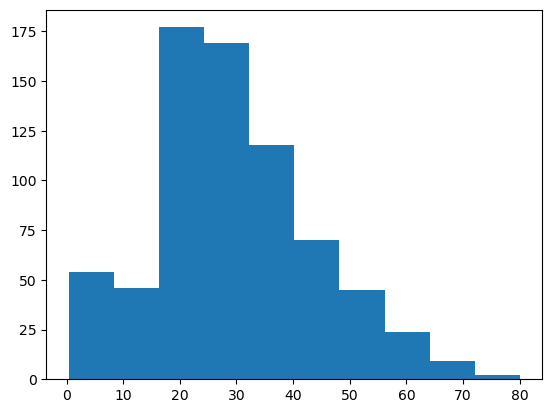

In [40]:
plt.hist(df.age)
plt.show()

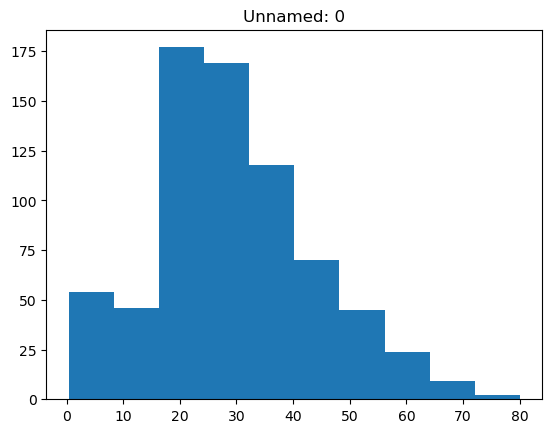

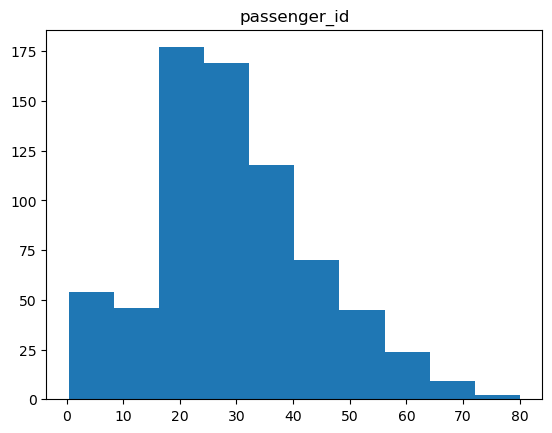

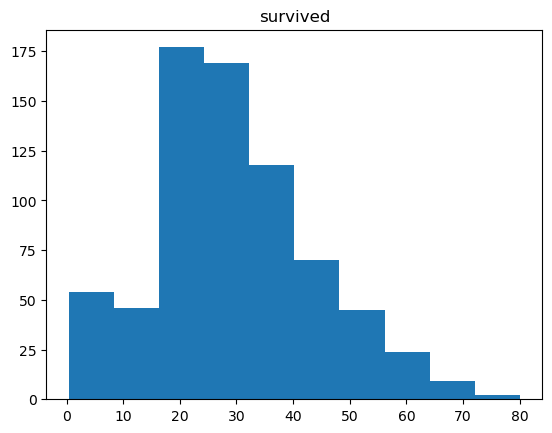

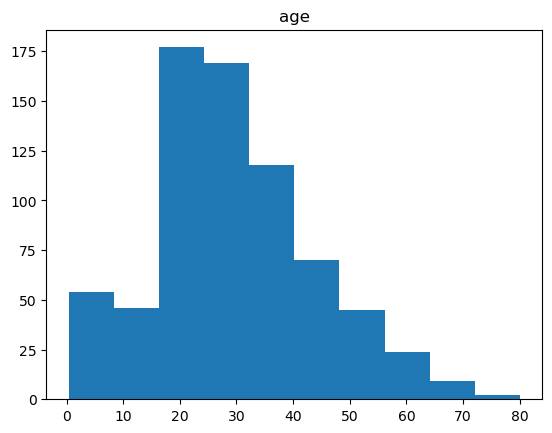

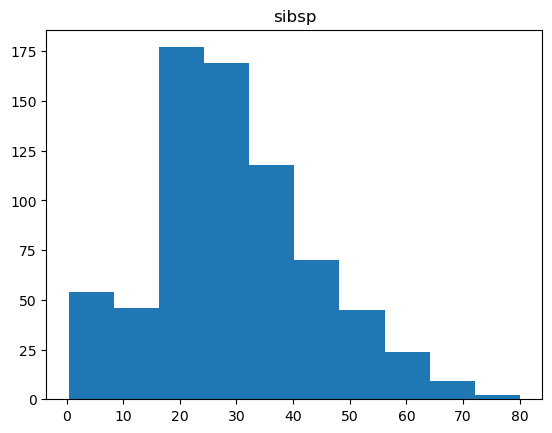

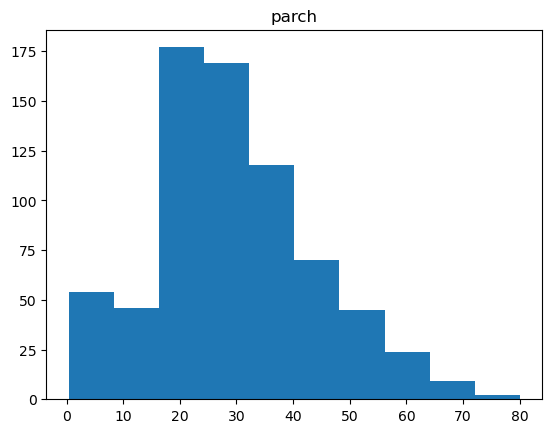

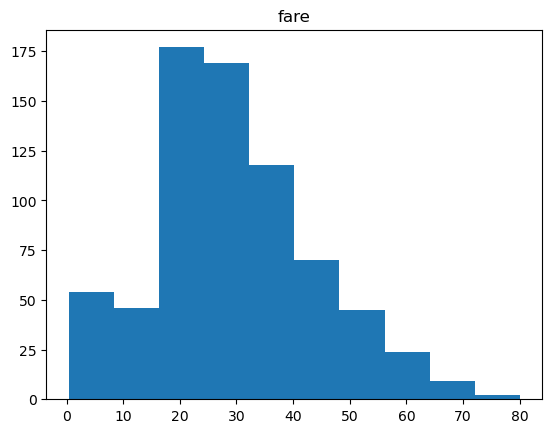

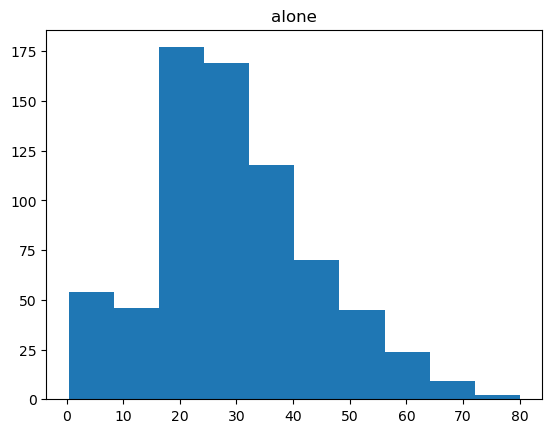

In [42]:
for col in df:
    if df[col].dtype != 'O':
        plt.hist(df.age)
        plt.title(col)
        plt.show() 
        
        # BOOM CHECK IT!

In [ ]:
# OK, what is left to do?
# drop class, passenger id, fix age, drop deck

In [49]:
df = df.drop(columns=['class','deck','passenger_id'])
df

,Unnamed: 0,survived,sex,age,sibsp,parch,fare,embark_town,alone
0,0,0,male,22.0,1,0,7.2500,Southampton,0
1,1,1,female,38.0,1,0,71.2833,Cherbourg,0
2,2,1,female,26.0,0,0,7.9250,Southampton,1
3,3,1,female,35.0,1,0,53.1000,Southampton,0
4,4,0,male,35.0,0,0,8.0500,Southampton,1
...,...,...,...,...,...,...,...,...,...
886,886,0,male,27.0,0,0,13.0000,Southampton,1
887,887,1,female,19.0,0,0,30.0000,Southampton,1
888,888,0,female,NaN,1,2,23.4500,Southampton,0
889,889,1,male,26.0,0,0,30.0000,Cherbourg,1


In [50]:
df.age.mean()

29.69911764705882

In [51]:
df['age'] = df['age'].fillna(df.age.mean())

In [53]:
df.info() # NOTE missingness is over!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   survived     891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embark_town  891 non-null    object 
 8   alone        891 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [55]:
# ENCODING
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,891.0,445.000000,257.353842,0.00,222.5000,445.000000,667.5,890.0000
survived,891.0,0.383838,0.486592,0.00,0.0000,0.000000,1.0,1.0000
age,891.0,29.699118,13.002015,0.42,22.0000,29.699118,35.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.000000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.000000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.454200,31.0,512.3292
alone,891.0,0.602694,0.489615,0.00,0.0000,1.000000,1.0,1.0000


In [57]:
df = df.drop(columns='Unnamed: 0')
df

,survived,sex,age,sibsp,parch,fare,embark_town,alone
0,0,male,22.000000,1,0,7.2500,Southampton,0
1,1,female,38.000000,1,0,71.2833,Cherbourg,0
2,1,female,26.000000,0,0,7.9250,Southampton,1
3,1,female,35.000000,1,0,53.1000,Southampton,0
4,0,male,35.000000,0,0,8.0500,Southampton,1
...,...,...,...,...,...,...,...,...
886,0,male,27.000000,0,0,13.0000,Southampton,1
887,1,female,19.000000,0,0,30.0000,Southampton,1
888,0,female,29.699118,1,2,23.4500,Southampton,0
889,1,male,26.000000,0,0,30.0000,Cherbourg,1


In [58]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.000000,1.0,1.0000
age,891.0,29.699118,13.002015,0.42,22.0000,29.699118,35.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.000000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.000000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.454200,31.0,512.3292
alone,891.0,0.602694,0.489615,0.00,0.0000,1.000000,1.0,1.0000


In [59]:
df.fare.nlargest(n=1) # ths fare price is ODD!

258    512.3292
Name: fare, dtype: float64

In [61]:
df.embark_town.value_counts()

Southampton    646
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [60]:
pd.get_dummies(df['embark_town'])

,Cherbourg,Queenstown,Southampton
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [62]:
pd.get_dummies(df['embark_town'],drop_first=True)

,Queenstown,Southampton
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [63]:
df

,survived,sex,age,sibsp,parch,fare,embark_town,alone
0,0,male,22.000000,1,0,7.2500,Southampton,0
1,1,female,38.000000,1,0,71.2833,Cherbourg,0
2,1,female,26.000000,0,0,7.9250,Southampton,1
3,1,female,35.000000,1,0,53.1000,Southampton,0
4,0,male,35.000000,0,0,8.0500,Southampton,1
...,...,...,...,...,...,...,...,...
886,0,male,27.000000,0,0,13.0000,Southampton,1
887,1,female,19.000000,0,0,30.0000,Southampton,1
888,0,female,29.699118,1,2,23.4500,Southampton,0
889,1,male,26.000000,0,0,30.0000,Cherbourg,1


In [68]:
df = pd.concat([df,pd.get_dummies(df['embark_town'],drop_first=True)],axis=1)
df

,survived,sex,age,sibsp,parch,fare,embark_town,alone,Queenstown,Southampton
0,0,male,22.000000,1,0,7.2500,Southampton,0,0,1
1,1,female,38.000000,1,0,71.2833,Cherbourg,0,0,0
2,1,female,26.000000,0,0,7.9250,Southampton,1,0,1
3,1,female,35.000000,1,0,53.1000,Southampton,0,0,1
4,0,male,35.000000,0,0,8.0500,Southampton,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,male,27.000000,0,0,13.0000,Southampton,1,0,1
887,1,female,19.000000,0,0,30.0000,Southampton,1,0,1
888,0,female,29.699118,1,2,23.4500,Southampton,0,0,1
889,1,male,26.000000,0,0,30.0000,Cherbourg,1,0,0


In [66]:
pd.get_dummies(df['sex'],drop_first=True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [69]:
df = pd.concat([df,pd.get_dummies(df['sex'],drop_first=True)],axis=1)
df

,survived,sex,age,sibsp,parch,fare,embark_town,alone,Queenstown,Southampton,male
0,0,male,22.000000,1,0,7.2500,Southampton,0,0,1,1
1,1,female,38.000000,1,0,71.2833,Cherbourg,0,0,0,0
2,1,female,26.000000,0,0,7.9250,Southampton,1,0,1,0
3,1,female,35.000000,1,0,53.1000,Southampton,0,0,1,0
4,0,male,35.000000,0,0,8.0500,Southampton,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,male,27.000000,0,0,13.0000,Southampton,1,0,1,1
887,1,female,19.000000,0,0,30.0000,Southampton,1,0,1,0
888,0,female,29.699118,1,2,23.4500,Southampton,0,0,1,0
889,1,male,26.000000,0,0,30.0000,Cherbourg,1,0,0,1


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   sex          891 non-null    object 
 2   age          891 non-null    float64
 3   sibsp        891 non-null    int64  
 4   parch        891 non-null    int64  
 5   fare         891 non-null    float64
 6   embark_town  891 non-null    object 
 7   alone        891 non-null    int64  
 8   Queenstown   891 non-null    uint8  
 9   Southampton  891 non-null    uint8  
 10  male         891 non-null    uint8  
dtypes: float64(2), int64(4), object(2), uint8(3)
memory usage: 58.4+ KB


In [ ]:
# cleaned_titanic = clean_titanic(get_titanic_data())

In [97]:
def clean_titanic(df):
    '''
    takes in single pd df and drops redundant cols and non-useful info in addition to addressing NULLS and
    encoding cats
    
    
    '''
    df = df.drop(columns =['passenger_id','embarked','deck','class','Unnamed: 0'])
    df['age'] = df['age'].fillna(df.age.mean())
    df['embark_town'] = df['embark_town'].fillna('Southampton')
    
    df = pd.concat([df,pd.get_dummies(df['embark_town'],drop_first=True)],axis=1)
    df = pd.concat([df,pd.get_dummies(df['sex'],drop_first=True)],axis=1)
    
    return df

# more columns to drop

In [71]:
df =acq.get_titanic_data('titanic_db')

In [75]:
clean_titanic(df)

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,Queenstown,Southampton,male
0,0,0,3,male,22.000000,1,0,7.2500,Southampton,0,0,1,1
1,1,1,1,female,38.000000,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,26.000000,0,0,7.9250,Southampton,1,0,1,0
3,3,1,1,female,35.000000,1,0,53.1000,Southampton,0,0,1,0
4,4,0,3,male,35.000000,0,0,8.0500,Southampton,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.000000,0,0,13.0000,Southampton,1,0,1,1
887,887,1,1,female,19.000000,0,0,30.0000,Southampton,1,0,1,0
888,888,0,3,female,29.699118,1,2,23.4500,Southampton,0,0,1,0
889,889,1,1,male,26.000000,0,0,30.0000,Cherbourg,1,0,0,1


In [76]:
df.drop(columns=['Unnamed: 0','sex','embark_town'])

,passenger_id,survived,pclass,age,sibsp,parch,fare,embarked,class,deck,alone
0,0,0,3,22.0,1,0,7.2500,S,Third,NaN,0
1,1,1,1,38.0,1,0,71.2833,C,First,C,0
2,2,1,3,26.0,0,0,7.9250,S,Third,NaN,1
3,3,1,1,35.0,1,0,53.1000,S,First,C,0
4,4,0,3,35.0,0,0,8.0500,S,Third,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,27.0,0,0,13.0000,S,Second,NaN,1
887,887,1,1,19.0,0,0,30.0000,S,First,B,1
888,888,0,3,NaN,1,2,23.4500,S,Third,NaN,0
889,889,1,1,26.0,0,0,30.0000,C,First,C,1


In [77]:
# SPLIT DATA  
from sklearn.model_selection import train_test_split

In [78]:
# split df into train_val and test
# then split the test_val into train and val
train_val, test = train_test_split(df,
                                   train_size=0.8,
                                   random_state=1349,
                                  stratify=df['survived'])

In [79]:
train_val.shape, test.shape

((712, 14), (179, 14))

In [80]:
train, validate = train_test_split(train_val,
                                  train_size=0.7,
                                  random_state=1349,
                                  stratify=train_val['survived']) # NOTE THE altererd Strat ARGUMENT

In [81]:
train.shape[0] + validate.shape[0] + test.shape[0] ==df.shape[0]

True

In [82]:
train.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
474,474,474,0,3,female,22.0,0,0,9.8375,S,Third,NaN,Southampton,1
370,370,370,1,1,male,25.0,1,0,55.4417,C,First,E,Cherbourg,0
573,573,573,1,3,female,NaN,0,0,7.7500,Q,Third,NaN,Queenstown,1
110,110,110,0,1,male,47.0,0,0,52.0000,S,First,C,Southampton,1
167,167,167,0,3,female,45.0,1,4,27.9000,S,Third,NaN,Southampton,0


In [98]:
def split_titanic_data(df,target='survived'):
    '''
    will take a df and split into Train-Validate-Test
    
    
    '''
    
    train_val, test = train_test_split(df,
                                   train_size=0.8,
                                   random_state=1349,
                                  stratify=df['survived'])
    train, validate = train_test_split(train_val,
                                  train_size=0.7,
                                  random_state=1349,
                                  stratify=train_val['survived']) # NOTE THE altererd Strat ARGUMENT
    return train, validate, test

In [99]:
def prep_titanic(df):
    df = clean_titanic(df)
    return split_titanic_data(df)

In [100]:
prep_titanic(acq.get_titanic_data('titanic_db'))

(     survived  pclass     sex        age  sibsp  parch     fare  embark_town  \
 474         0       3  female  22.000000      0      0   9.8375  Southampton   
 370         1       1    male  25.000000      1      0  55.4417    Cherbourg   
 573         1       3  female  29.699118      0      0   7.7500   Queenstown   
 110         0       1    male  47.000000      0      0  52.0000  Southampton   
 167         0       3  female  45.000000      1      4  27.9000  Southampton   
 ..        ...     ...     ...        ...    ...    ...      ...          ...   
 735         0       3    male  28.500000      0      0  16.1000  Southampton   
 163         0       3    male  17.000000      0      0   8.6625  Southampton   
 770         0       3    male  24.000000      0      0   9.5000  Southampton   
 196         0       3    male  29.699118      0      0   7.7500   Queenstown   
 94          0       3    male  59.000000      0      0   7.2500  Southampton   
 
      alone  Queenstown  S